<a href="https://colab.research.google.com/github/a-forty-two/AIYA_batchmorning_0108/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install pillow

In [3]:
# myapikey 
# myendpoint https://boaconstrictor.cognitiveservices.azure.com/


In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = "6b981e2be90b43c9ac5cdcda532af928"
endpoint = "https://boaconstrictor.cognitiveservices.azure.com"

In [5]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [6]:
dir(computervision_client)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_client',
 '_deserialize',
 '_serialize',
 'analyze_image',
 'analyze_image_by_domain',
 'analyze_image_by_domain_in_stream',
 'analyze_image_in_stream',
 'api_version',
 'close',
 'config',
 'describe_image',
 'describe_image_in_stream',
 'detect_objects',
 'detect_objects_in_stream',
 'generate_thumbnail',
 'generate_thumbnail_in_stream',
 'get_area_of_interest',
 'get_area_of_interest_in_stream',
 'get_read_result',
 'list_models',
 'read',
 'read_in_stream',
 'recognize_printed_text',
 'recognize_printed_text_in_stream',
 'tag_image',
 'tag_image_in_stream']

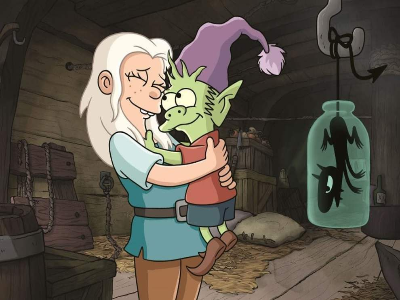

In [11]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('4.jpg')
img = cv2.resize(img, (400,300))
cv2_imshow(img)


In [12]:
!ls

4.jpg  sample_data


In [13]:
!ls

4.jpg  sample_data


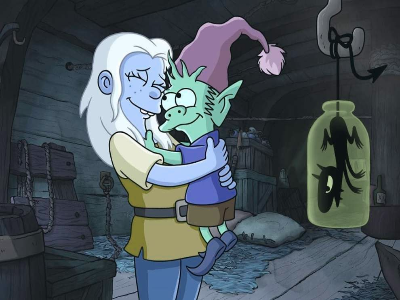

In [14]:
# HEX, OCT, DECIMAL-> R,G,B; C,M,Y; 
# solid = > black, light-> white 
# Brightness, Hue, Saturation 
# Programming-> B,G,R
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img2)

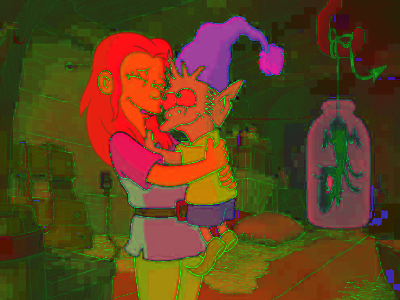

In [15]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img3)

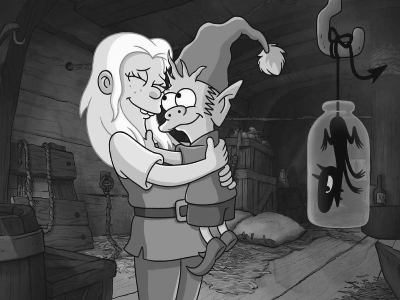

In [16]:
imgx = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgx)

In [17]:
#3 matrices-> 1 matrix-> (b,g,r)
# 3D-> 3 scales
# R,G,B,A-> transparency
img.shape

(300, 400, 3)

In [20]:
img[299][399] # LAST PIXEL

array([45, 45, 51], dtype=uint8)

In [21]:
img2 = img[100:150] 

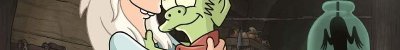

In [22]:
cv2_imshow(img2)

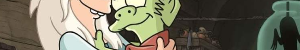

In [24]:
img2 = img[100:150, 50:-50] # SLICING and DICING 
cv2_imshow(img2)

In [25]:
!ls

4.jpg  i1.png  i2.png  i3.png  i4.png  sample_data


In [26]:
i1 = cv2.imread('i1.png')
i2 = cv2.imread('i2.png')
i3 = cv2.imread('i3.png')
i4 = cv2.imread('i4.png')

(100, 100, 3)


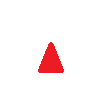

In [31]:
print(i1.shape)
cv2_imshow(i1)

(100, 100, 3)


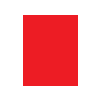

In [32]:
print(i2.shape)
cv2_imshow(i2)

(100, 100, 3)


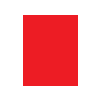

In [33]:
print(i3.shape)
cv2_imshow(i3)

(100, 100, 3)


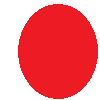

In [34]:
print(i4.shape)
cv2_imshow(i4)

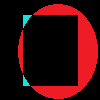

In [35]:
# elemental
# [[a,b],[c,d]] X [[x,y],[p,q]] = [[ax, by], [cq, dq]]
i5 = i4-i3 
cv2_imshow(i5)

In [36]:
i4[0][0]

array([255, 255, 255], dtype=uint8)

In [37]:
i3[0][0]

array([255, 255, 255], dtype=uint8)

In [38]:
i5[0][0]

array([0, 0, 0], dtype=uint8)

In [39]:
# cnnot be BELOW 0, GT 255

In [40]:
!wget https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/i1.png

--2021-08-07 07:01:27--  https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/i1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451 [image/png]
Saving to: ‘i1.png.1’

i1.png.1            100%[===================>]     451  --.-KB/s    in 0s      

2021-08-07 07:01:27 (23.1 MB/s) - ‘i1.png.1’ saved [451/451]



In [42]:
allfilenames = ['whoooo111.jpg','cat2.jpg','1.jpg','1234.png','2.jpg']
baseurl = 'https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/'
filenames = []
for filename in allfilenames:
  filepath = baseurl + filename
  filenames.append(filepath)

filenames
#result = computervision_client.describe_image('4.jpg')

['https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/whoooo111.jpg',
 'https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/cat2.jpg',
 'https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/1.jpg',
 'https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/1234.png',
 'https://raw.githubusercontent.com/a-forty-two/AIYA_batchmorning_0108/main/2.jpg']

In [43]:
for filename in filenames:
  result = computervision_client.describe_image(filename)
  print(result)

{'additional_properties': {}, 'tags': ['text', 'person'], 'captions': [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageCaption object at 0x7fdb2ca83550>], 'request_id': 'ba2355cf-1f05-49c3-aee9-45f3d377f82b', 'metadata': <azure.cognitiveservices.vision.computervision.models._models_py3.ImageMetadata object at 0x7fdb2c9fc350>, 'model_version': '2021-05-01'}
{'additional_properties': {}, 'tags': ['cat', 'indoor', 'domestic cat', 'animal', 'green', 'mammal', 'white', 'blue', 'eyes', 'gray', 'staring'], 'captions': [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageCaption object at 0x7fdb2ca10e90>], 'request_id': '585377b1-f792-4cac-a9d9-b369e1257226', 'metadata': <azure.cognitiveservices.vision.computervision.models._models_py3.ImageMetadata object at 0x7fdb2ca10cd0>, 'model_version': '2021-05-01'}
{'additional_properties': {}, 'tags': ['text'], 'captions': [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageCaption object a

In [53]:
for filename in filenames:
  result = computervision_client.analyze_image(filename, ["Brands"])
  print(result.objects)
  print('*****')

None
*****
None
*****
None
*****
None
*****
None
*****
